<a href="https://colab.research.google.com/github/bilalkhanjadoon/PRODIGY_ML_Task1/blob/main/Prodigy_ml_task01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Note on Feature Selection and Model Performance**

In the initial question, I was asked to utilize only the area, total bedrooms, and bathrooms to predict the target variable.
However, when I trained a linear regression model using just these features, the resulting accuracy was less than 10%.
Recognizing the limitations of this approach, I added more features to the dataset, which improved the accuracy to 66%.
To further enhance the model's performance, advanced algorithms such as Random Forest can be employed, which are capable of achieving an accuracy of over 80%.
This highlights the importance of feature engineering and model selection in predictive modeling tasks.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# load the dataset
data = pd.read_csv("/content/drive/MyDrive/Prodigy_intership/housing.csv")
#Renaming the output column name
data.rename(columns={'median_house_value': 'price'}, inplace=True)


In [45]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   price               20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [46]:
# Removing the missing values
data.dropna(inplace=True)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   price               20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [48]:
# Import the train_test_split function to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Define the features (X) by dropping the 'price' (target variable) and 'ocean_proximity' columns from the dataset
# 'ocean_proximity' is excluded because it is categorical and may require encoding before use in some models
X = data.drop(['price', 'ocean_proximity'], axis=1)

# Define the target variable (y), which is the column 'price' that we aim to predict
y = data['price']


In [49]:
# Split the dataset into training and testing sets
# X contains the features, while y is the target variable (price)
# test_size=0.2 means 20% of the data will be used for testing, and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [50]:
# Combine the training features (X_train) and target variable (y_train) into a single DataFrame
train_data = X_train.join(y_train)

# Similarly, combine the testing features (X_test) and target variable (y_test) into a single DataFrame
test_data = X_test.join(y_test)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

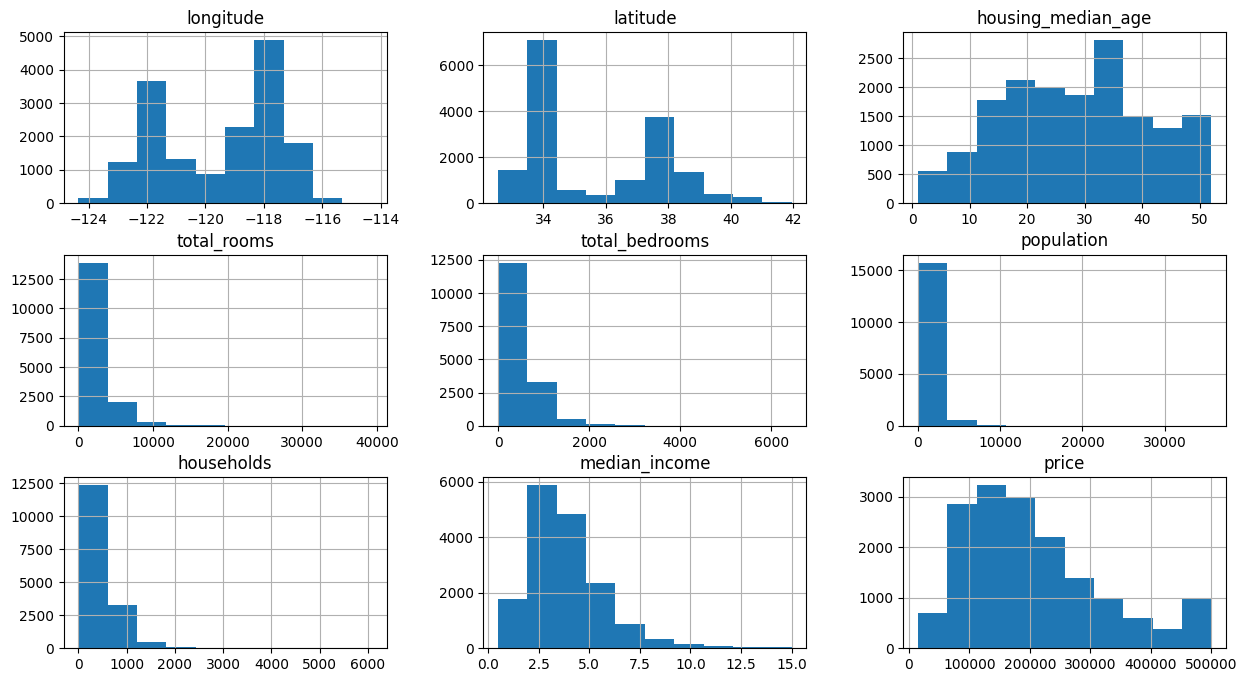

In [51]:
# visulize the data
train_data.hist(figsize=(15,8))

<Axes: >

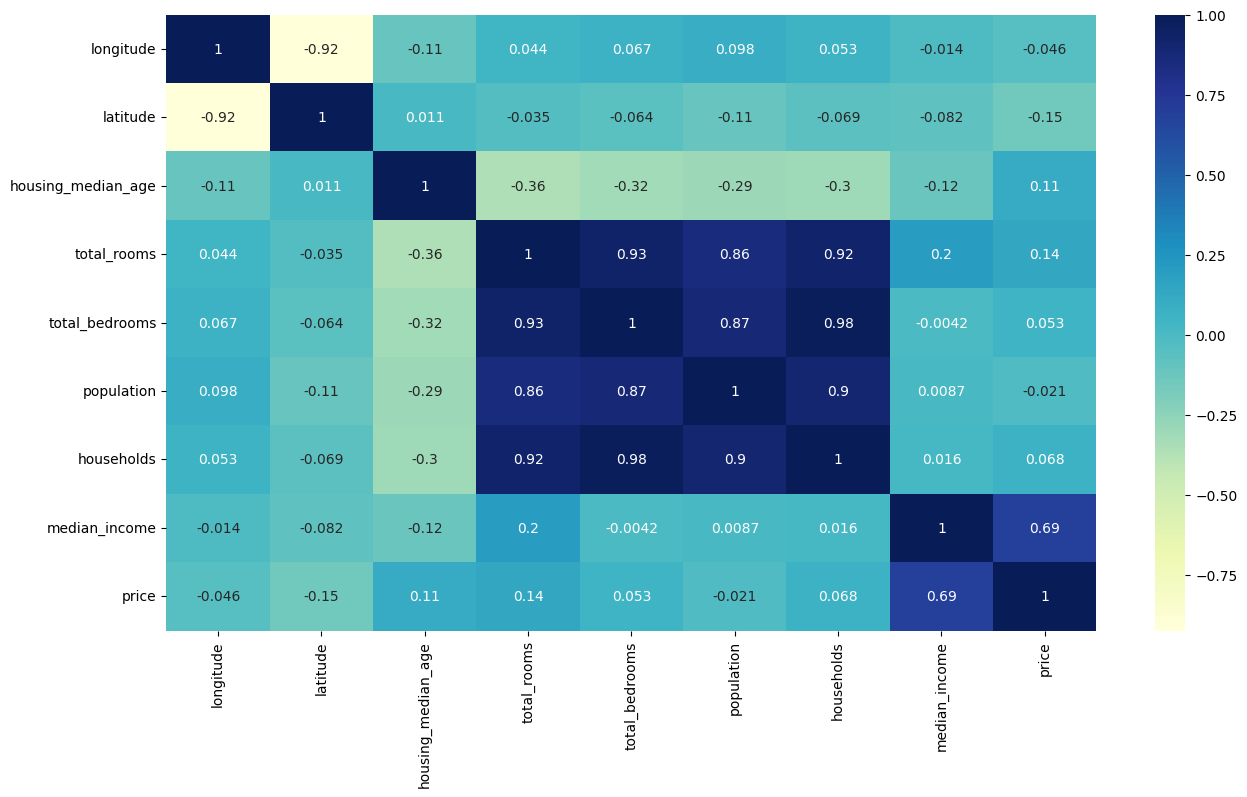

In [52]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [53]:
# Preprocessing - Apply log transformation to reduce skewness in specific features
# Log transformation is used here to reduce the effect of extreme values (skewness) in the data distribution,
# making the features more normally distributed, which can improve model performance.

# Log transform 'total_bedrooms' in the training data to reduce skewness
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)

# Log transform 'total_rooms' in the training data
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)

# Log transform 'population' in the training data
train_data['population'] = np.log(train_data['population'] + 1)

# Log transform 'households' in the training data
train_data['households'] = np.log(train_data['households'] + 1)

# Repeat the log transformation for the test data on the same features
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

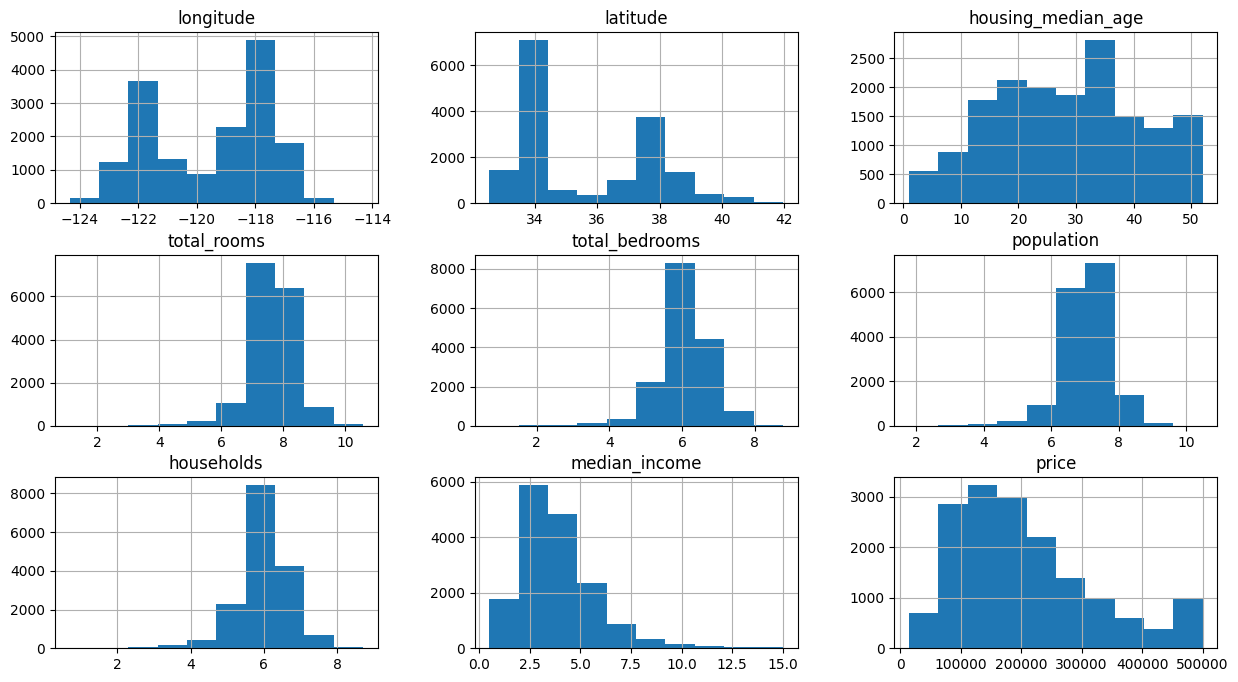

In [54]:
train_data.hist(figsize=(15,8))

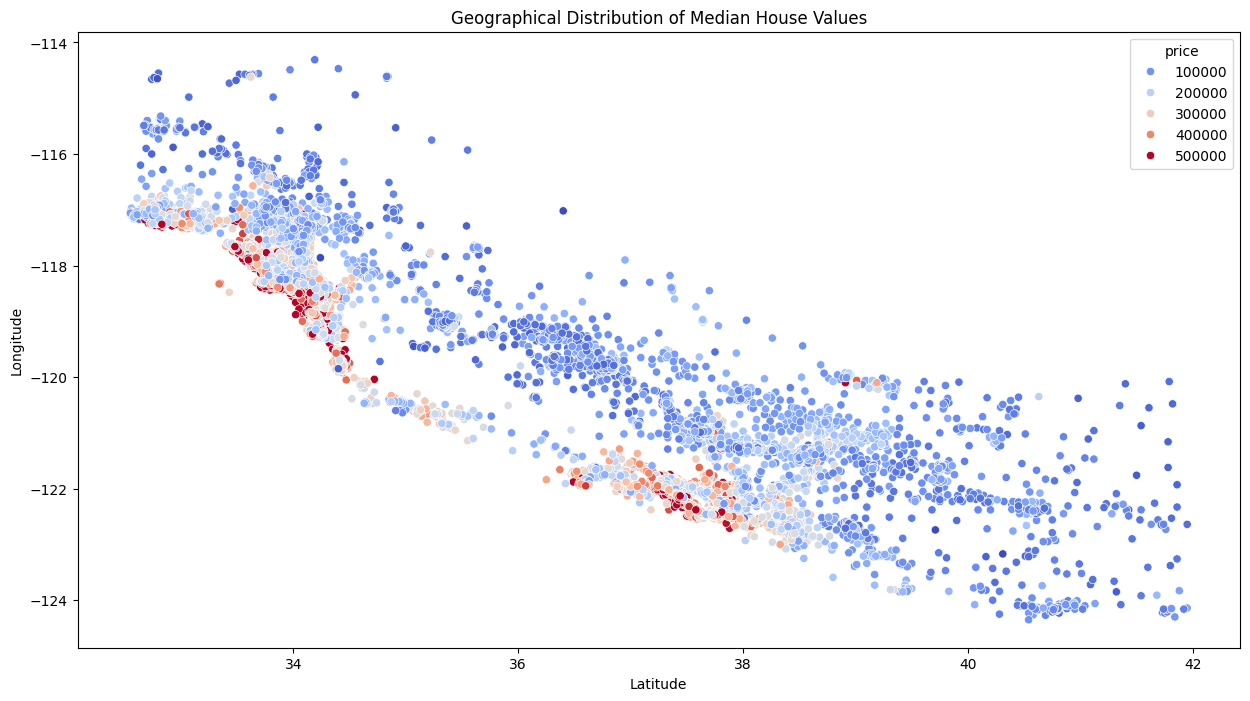

In [55]:
# Set the size of the figure for better visibility of the plot
plt.figure(figsize=(15, 8))

# Create a scatter plot to visualize the relationship between latitude and longitude
# Using the seaborn library's scatterplot function
# The hue parameter is set to "median_house_value" to color the points based on house values,
# providing a visual indication of house prices in different geographical locations.
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="price", palette="coolwarm")

# Add titles and labels to the plot for better interpretation (optional)
plt.title("Geographical Distribution of Median House Values")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

# Display the plot
plt.show()


In [56]:
# Feature Engineering
# Create a new feature 'bedroom_ratio' that represents the ratio of bedrooms to total rooms.
# This feature can provide insights into the density of bedrooms in relation to overall space.
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']

# Create a new feature 'household_rooms' that indicates the average number of rooms per household.
# This can help understand the space available per household.
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

# Assuming an average area per room
average_room_area = 200  # Hypothetical average area in square feet

# Create a new feature for estimated square area
train_data['sq_area'] = train_data['total_rooms'] * average_room_area


# Create a new feature 'total_bathrooms' based on a more flexible estimate
# Assume an average of 3 rooms per bathroom
average_rooms_per_bathroom = 3
train_data['total_bathrooms'] = train_data['total_rooms'] / average_rooms_per_bathroom

# Repeat the same feature engineering for the test dataset to ensure consistency in feature sets
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']
test_data['sq_area'] = test_data['total_rooms'] * average_room_area
test_data['total_bathrooms'] = test_data['total_rooms'] / average_rooms_per_bathroom


In [57]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,price,bedroom_ratio,household_rooms,sq_area,total_bathrooms
1552,-121.97,37.79,17.0,8.646290,6.715383,7.655391,6.651572,6.6131,312500.0,0.776678,1.299887,1729.257953,2.882097
15700,-122.44,37.79,52.0,7.505492,6.284134,6.685861,6.190315,3.9750,500001.0,0.837271,1.212457,1501.098455,2.501831
3406,-118.30,34.26,28.0,7.404888,6.194405,7.041412,6.129050,3.1607,200600.0,0.836529,1.208162,1480.977515,2.468296
2791,-118.39,37.37,25.0,8.100465,6.715383,7.298445,6.647688,1.8325,105800.0,0.829012,1.218539,1620.092978,2.700155
8883,-118.50,34.03,52.0,7.317876,5.342334,6.306275,5.231109,7.8705,500001.0,0.730039,1.398915,1463.575240,2.439292


In [58]:
test_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,price,bedroom_ratio,household_rooms,sq_area,total_bathrooms
20021,-119.06,36.08,19.0,7.845808,6.095825,7.171657,6.040255,4.1856,72100.0,0.776953,1.298920,1569.161501,2.615269
8011,-118.12,33.85,37.0,7.857481,6.118097,7.195937,6.177944,4.3661,219900.0,0.778633,1.271860,1571.496157,2.619160
13279,-117.65,34.10,44.0,7.331060,5.823046,6.723832,5.789960,3.0284,115800.0,0.794298,1.266168,1466.212061,2.443687
16054,-122.48,37.76,52.0,8.089789,6.483107,7.374629,6.450470,4.4094,336100.0,0.801394,1.254139,1617.957835,2.696596
20019,-119.05,36.09,9.0,8.101072,6.343880,7.467371,6.343880,4.0217,99200.0,0.783092,1.276990,1620.214301,2.700357


<Axes: >

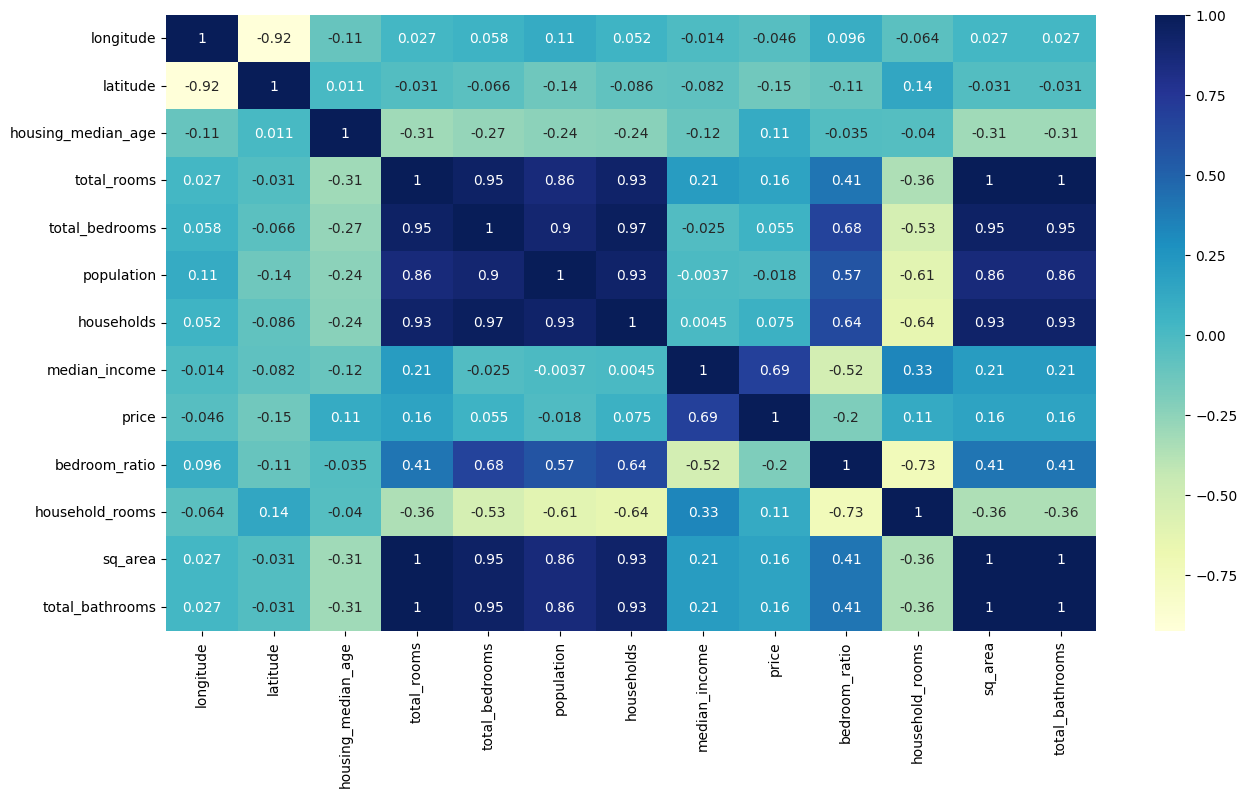

In [59]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [60]:
from sklearn.linear_model import LinearRegression  # Importing the LinearRegression class from sklearn library

# Preparing the training data by separating the features (X_train) and the target variable (y_train)
# Here, 'price' is the target variable, which we want to predict, and all other columns in train_data are considered features
X_train, y_train = train_data.drop(['price'], axis=1), train_data['price']

# Initializing the Linear Regression model
model = LinearRegression()

# Fitting the model to the training data
# This step involves training the model to learn the relationship between the features (X_train) and the target variable (y_train)
model.fit(X_train, y_train)


LinearRegression()

In [61]:
# Evaluating the performance of the trained model on the test data
# The score method computes the coefficient of determination (R^2) of the prediction
# This value indicates how well the model's predictions correlate with the actual values in the test dataset
X_test, y_test = test_data.drop(['price'], axis=1), test_data['price']
# Ensure that the columns are in the same order for both datasets
X_train_columns = X_train.columns.tolist()
X_test = X_test[X_train_columns]  # Reorder X_test to match X_train columns
model.score(X_test, y_test)


0.6527183751151941

In [62]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 48624.53078588985


In [63]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 4631125986.713031


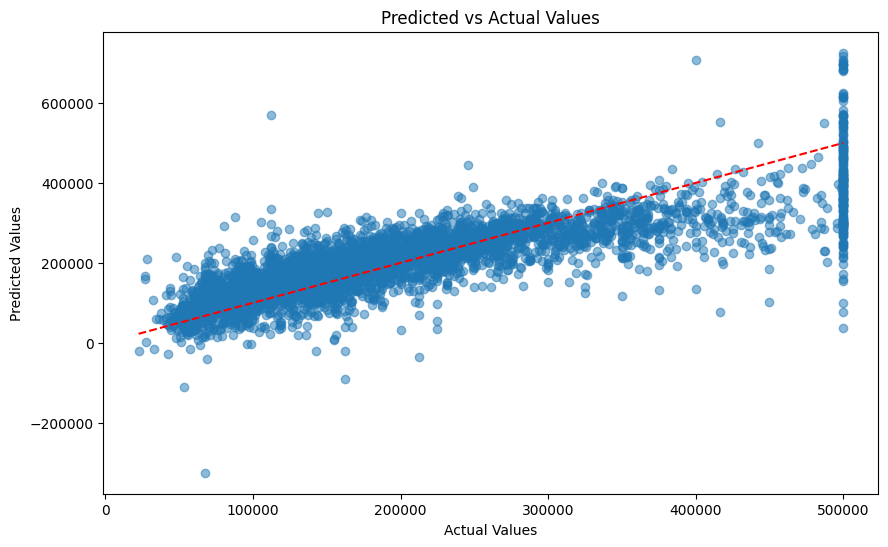

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()